<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/WQU_ML_Group_4705_Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal components**

## **Basics**

Principal components refer to a set of new variables that result from transforming or rotating the original variables in a dataset. These new variables, known as principal components, are linear combinations of the original variables and are designed to capture the maximum variance in the data.

The principal components are ordered by the amount of variance they explain, with the first principal component explaining the most variance, the second explaining the second most, and so on. This technique is commonly used in dimensionality reduction, where the goal is to reduce the number of variables in a dataset while retaining as much information as possible.



Principal Component Analysis reduces dimensionality of a high dimensional dataset while striving to retain as much variance in the original dataset as possible.
It does this through feature extraction, that is, new features are formed by performing a linear combination of the original features.
By applying PCA to a dataset, we are able to learn different representations of the data explaining the original data points.

The linear transformation of the features can be represented by the equation $$y = WX$$ where $W$ are the weights, $X$ the original features and $y$, the principal components.

The linear transform poses challenge in that it makes the transformed features less interpretable and therefore not useful for follow-up analysis.

The principal components, $y_i$, explains a higher percent of the original data's variability and the weights $W_{ij}$ show the contribution of our original features to the resulting principal components.

Consider an example with two variables; $$y_i = w_{i,1} x_1 + w_{i2} x_2$$

We refer to the weights $(w_{i,1}, w_{i,2})$ as the component **loadings**. The first principal component, $y_1$, explains most of the variation in our dataset, $y_2$ which is orthogonal to $y_1$ explains most of the remaining variations. If we had more features, then the additional principal components would be orthogonal to each other as well.

The new variables we find can be linearly combined to get back our original data features. These new variables are referred to as the principal components (PCs) and the PCs are orthogonal (independent) of each other.

## **Advantages**

1. Dimensionality reduction: PCA reduces the number of features, making data analysis and visualization easier.
2. Interpretability: PCA helps identify the underlying structure of the data and the relationships between variables.
3. Noise Reduction and reducing the risk of overfitting.

## **Computation and Illustration**

Calculating the principal components involves the use of a correlation matrix of the data or a covariance matrix, and it only works on numerical features. These are the steps to performing dimensionality reduction.

1. Standardization: The first step in a PCA process is to standardize the dataset. This is necessary because PCA is sensitive to datasets whose features have different value ranges or have outliers. This step would therefore ensure that each feature contributes equally. Standardization is achieved by substracting from a feature its mean and dividing by its standard deviation. The standardized feature would therefore have a mean of zero and standard deviation of one (unit length of one).

2. Centering data around the origin: We proceed by calculating the average of each feature and find the center of the data. We shift the data so that our center is at the origin without altering the distance between the data points.

3. The first principal component (PC1) is computed by finding a linear combination of the features that maximizes the total variation in the data
$$Y_1 = a_{11} X_1 + a_{12} X_2 + \cdots + a_{1N} X_N$$ The implication of this is that we can increase the variance of $Y_1$ to be as large as possible. To prevent such an occurrence, the sum of squares of the weights is equal to 1, that is,
$$a_{11}^2 + a_{12}^2 +\cdots a_{1N}^2 = 1$$

4. We repeat this process by finding the principal component (PC2) that passes through the origin and is orthogonal (i.e., uncorrelated) to PC1 and accounts for the next high variance.
$$Y_2 = a_{21} X_1 + a_{22} X_2 + \cdots + a_{2N} X_N$$
5. This process continues until we have as many principal components as the original features. Once we have all the principal components, then the total variance of the principal components will equal the total variance of the original features, and with this, we are certain that no information has been lost in the transformation process. As seen in the steps above, the PCA rotates data samples in the direction of the axes, then shifts the data so that their mean equals 0 but most importantly ensuring that no information is lost in the process.

In matrix form, finding PCA can be written as $$Y= XA$$

The rows of the matrix $A$ are the eigenvectors and they specify how the principal components are oriented compared to the original features. The composition of the eigenvectors are the weights $a_{ij}$ and are referred to as the loadings. Loadings tell us how each feature contributes to a principal component.

Loadings range from $-1$ to $1$ and large loadings (close to $1$ or $-1$) indicate the presence of a strong relationship between a particular feature and the principal component while loadings closer to zero indicate a weaker relationship. The sign of the loading shows whether a feature is positively or negatively correlated to the principal component.

Given a matrix $A$ and the variance-covariance matrix of our original data, $S_X$, then the variance-covariance matrix of the resulting principal components will be $$S_Y = A S_X A^T$$

$S_Y$ is a diagonal matrix whose values are the eigenvalues (or the explained variance) by the corresponding principal components. The PCA performs dimensional reduction by projecting data onto the principal component space and then orders the sequence of PCs in the direction of the largest variance in our dataset. This ensures that the PCs are not correlated with each other and they form a set of orthogonal basis.
Therefore the eigenvalues are arranged such that they decrease monotonically from the largest to the smallest. We use **scree plot** to visualize the rate at which the explained variance is decreasing as we add more principal components.

An ideal scree plot would steadily bend and resemble an elbow plot, where insignificant PCs will flatten out and we get a nice cut-off allowing us to pick the number of optimal PCs easily. In case the scree plot is not so ideal, we can use the rules below to choose the PCs.
1. Apply the Kaiser rule, that is, the PCs should have an eigenvalue of at least 1.
2. The selected PCs should contribute at least $80\%$ of the variance.

In case we get more than 3 PCs, we should consider using other dimensional reduction techniques as the PCA would not be the best way to visualize our data. In the new coordinate system, the position of the principal components are called the scores.


In this approach, we consider the historical data describing the market variables' movement and define factors that will explain the movements.

We will consider yield data with maturities of 1 month, 3 months, 6 months, 1 year, 2 years, 3 years, 5 years, 7 years, 10 years, 20 years, and 30 years.

Then we wil use results to calculate VaR for our portfolio.

In [ ]:
# Load libraries
# Global Libraries
# Disable the warnings
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import scipy as sp

# Plotting
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

In [ ]:
# downloading the U.S. yield data ranging from 1-month to 30-year rates.
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
data = [
    "DGS1MO",
    "DGS3MO",
    "DGS6MO",
    "DGS1",
    "DGS2",
    "DGS3",
    "DGS5",
    "DGS7",
    "DGS10",
    "DGS20",
    "DGS30",
]
data = web.DataReader(data, "fred", start, end).dropna(how="all").ffill()

In [ ]:
data.rename(
    columns={
        "DGS1MO": "1m",
        "DGS3MO": "3m",
        "DGS6MO": "6m",
        "DGS1": "1y",
        "DGS2": "2y",
        "DGS3": "3y",
        "DGS5": "5y",
        "DGS7": "7y",
        "DGS10": "10y",
        "DGS20": "20y",
        "DGS30": "30y",
    },
    inplace=True,
)
df = data.copy()
df.head(10)

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
DATE,,,,,,,,,,,
2002-07-01,1.71,1.72,1.78,2.09,2.88,3.35,4.08,4.54,4.85,5.64,5.67
2002-07-02,1.72,1.72,1.76,2.04,2.78,3.24,3.99,4.45,4.77,5.56,5.64
2002-07-03,1.71,1.72,1.74,2.02,2.78,3.25,4.00,4.47,4.78,5.57,5.62
2002-07-05,1.71,1.72,1.77,2.08,2.90,3.38,4.13,4.60,4.90,5.67,5.70
2002-07-08,1.73,1.73,1.78,2.08,2.84,3.32,4.07,4.53,4.84,5.63,5.66
2002-07-09,1.72,1.72,1.75,2.01,2.74,3.21,3.98,4.47,4.78,5.57,5.60
2002-07-10,1.73,1.72,1.74,1.97,2.61,3.07,3.85,4.33,4.66,5.48,5.53
2002-07-11,1.72,1.72,1.74,1.95,2.61,3.07,3.86,4.33,4.66,5.47,5.57
2002-07-12,1.71,1.71,1.74,1.97,2.56,3.02,3.82,4.30,4.63,5.45,5.55


**EDA**

In [ ]:
df.shape

(5005, 11)

In [ ]:
df2 = df.copy()

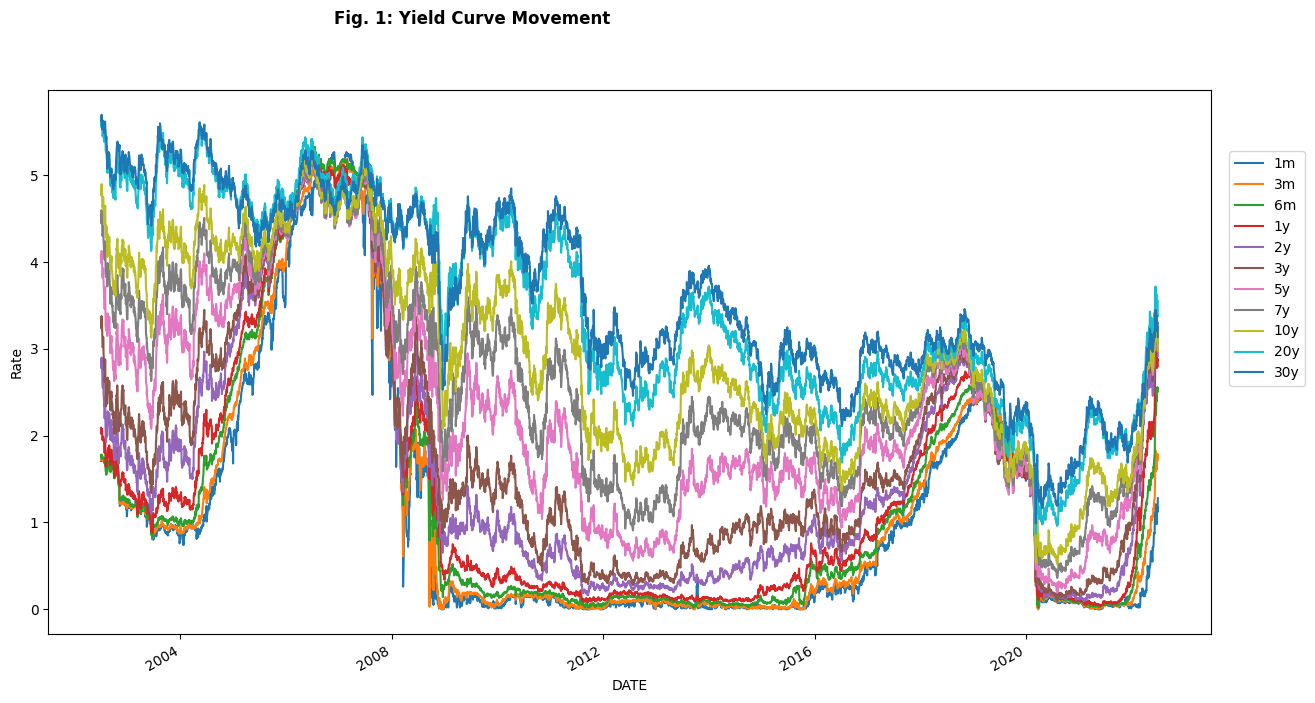

In [ ]:
#visualizing the movement of the yield curves.
df.plot(figsize=(15, 8))
pyplot.ylabel("Rate")
pyplot.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
pyplot.suptitle(
    "Fig. 1: Yield Curve Movement", fontweight="bold", horizontalalignment="right"
)
pyplot.show()

### **Generating Principal components**

When we apply PCA to the dataset, we can extract its signal and find the minimum quantity of data that will account for the largest percentage of the whole dataset.

We then detrend the data by standardizing it into z-scores.

In [ ]:
df_std = (df - df.mean()) / df.std()
df_std.head()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
DATE,,,,,,,,,,,
2002-07-01,0.398440,0.357447,0.315405,0.462856,0.900838,1.137623,1.473448,1.651674,1.683556,1.830100,1.869437
2002-07-02,0.405302,0.357447,0.302208,0.429151,0.829403,1.055036,1.400386,1.574498,1.613394,1.762432,1.842133
2002-07-03,0.398440,0.357447,0.289011,0.415669,0.829403,1.062544,1.408504,1.591649,1.622164,1.770890,1.823931
2002-07-05,0.398440,0.357447,0.308806,0.456115,0.915125,1.160147,1.514038,1.703125,1.727408,1.855475,1.896740
2002-07-08,0.412163,0.364196,0.315405,0.456115,0.872264,1.115099,1.465330,1.643099,1.674786,1.821641,1.860335


In [ ]:
cov_matrix_array = np.array(np.cov(df_std, rowvar=False))
cov_matrix_array

array([[1.        , 0.99701631, 0.98989716, 0.97854419, 0.95040032,
        0.91999929, 0.84280652, 0.76318831, 0.67622533, 0.53605151,
        0.48261981],
       [0.99701631, 1.        , 0.99694562, 0.98890759, 0.96447202,
        0.9348643 , 0.85677389, 0.77550565, 0.6864374 , 0.54346031,
        0.48717296],
       [0.98989716, 0.99694562, 1.        , 0.9966086 , 0.97730478,
        0.94968885, 0.87251221, 0.79054745, 0.70049746, 0.55566519,
        0.49581204],
       [0.97854419, 0.98890759, 0.9966086 , 1.        , 0.99000033,
        0.96774617, 0.89586494, 0.81580101, 0.72531185, 0.58069832,
        0.51856048],
       [0.95040032, 0.96447202, 0.97730478, 0.99000033, 1.        ,
        0.99239207, 0.94052152, 0.87158186, 0.78572114, 0.64775487,
        0.58540167],
       [0.91999929, 0.9348643 , 0.94968885, 0.96774617, 0.99239207,
        1.        , 0.97327929, 0.9202046 , 0.84441007, 0.71819665,
        0.65850485],
       [0.84280652, 0.85677389, 0.87251221, 0.89586494, 0.

In [ ]:
cov_df = pd.DataFrame(cov_matrix_array, columns=df.columns, index=df.columns)
cov_df

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
1m,1.000000,0.997016,0.989897,0.978544,0.950400,0.919999,0.842807,0.763188,0.676225,0.536052,0.482620
3m,0.997016,1.000000,0.996946,0.988908,0.964472,0.934864,0.856774,0.775506,0.686437,0.543460,0.487173
6m,0.989897,0.996946,1.000000,0.996609,0.977305,0.949689,0.872512,0.790547,0.700497,0.555665,0.495812
1y,0.978544,0.988908,0.996609,1.000000,0.990000,0.967746,0.895865,0.815801,0.725312,0.580698,0.518560
2y,0.950400,0.964472,0.977305,0.990000,1.000000,0.992392,0.940522,0.871582,0.785721,0.647755,0.585402
3y,0.919999,0.934864,0.949689,0.967746,0.992392,1.000000,0.973279,0.920205,0.844410,0.718197,0.658505
5y,0.842807,0.856774,0.872512,0.895865,0.940522,0.973279,1.000000,0.984662,0.940220,0.848165,0.800376
7y,0.763188,0.775506,0.790547,0.815801,0.871582,0.920205,0.984662,1.000000,0.983530,0.923260,0.887550
10y,0.676225,0.686437,0.700497,0.725312,0.785721,0.844410,0.940220,0.983530,1.000000,0.975025,0.952475
20y,0.536052,0.543460,0.555665,0.580698,0.647755,0.718197,0.848165,0.923260,0.975025,1.000000,0.991085


In [ ]:
# Perform eigendecomposition on the covariance matrix and find the percentage of the eigenvectors as a percentage of the total variance.

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_array)

# Put data into a DataFrame and save to excel
df_eigval = pd.DataFrame({"Eigenvalues": eigenvalues})

eigenvalues

array([9.30364724e+00, 1.55317701e+00, 1.16064486e-01, 1.52073529e-02,
       5.53568809e-03, 3.64052488e-03, 1.20924178e-03, 6.95872314e-04,
       1.74241629e-04, 2.52639447e-04, 3.95700198e-04])

In [ ]:
# We calculate explained variance

explained_variance = [round(variance / sum(eigenvalues), 3) for variance in eigenvalues]
explained_variance

[0.846, 0.141, 0.011, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
# Save output to Excel
columns = [
    "PC1",
    "PC2",
    "PC3",
    "PC4",
    "PC5",
    "PC6",
    "PC7",
    "PC8",
    "PC9",
    "PC10",
    "PC11",
]
df_eigvec = pd.DataFrame(eigenvectors, columns=columns, index=df.columns)

df_eigvec.to_excel("df_eigvec.xlsx")
eigenvectors[0]

array([ 0.29884762,  0.30068559,  0.45975834,  0.46531405, -0.13380497,
       -0.36851714, -0.40748101,  0.2512967 ,  0.0395651 ,  0.08896928,
       -0.00172923])

In [ ]:
df_eigvec

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1m,0.298848,0.300686,0.459758,0.465314,-0.133805,-0.368517,-0.407481,0.251297,0.039565,0.088969,-0.001729
3m,0.301982,0.298141,0.330672,0.136150,0.025182,0.078686,0.444567,-0.578032,-0.080010,-0.372915,0.089353
6m,0.305050,0.288273,0.174469,-0.206979,0.242158,0.354228,0.227966,0.119633,0.181965,0.633722,-0.255831
1y,0.309276,0.262461,-0.014895,-0.408482,0.129362,0.217822,-0.137191,0.484804,-0.354758,-0.452961,0.138987
2y,0.316910,0.185601,-0.285684,-0.371349,-0.200027,-0.175227,-0.241468,-0.229083,0.603398,-0.020993,0.315554
3y,0.321990,0.099425,-0.405800,-0.086180,-0.243680,-0.318380,-0.022405,-0.244984,-0.601207,0.297600,-0.207499
5y,0.323103,-0.079812,-0.383324,0.311138,-0.064057,-0.019788,0.264179,0.265284,0.315463,-0.330422,-0.540494
7y,0.314257,-0.212167,-0.264631,0.424552,0.053113,0.185457,0.220749,0.178908,-0.075238,0.208638,0.662427
10y,0.298731,-0.328539,-0.026318,0.144642,0.330414,0.392473,-0.591747,-0.362172,-0.040253,-0.063760,-0.176012
20y,0.266688,-0.460667,0.209810,-0.255758,0.498101,-0.567897,0.181888,0.049459,0.023129,-0.005140,0.022999


The indices in the table above are the maturities of the rates that we considered for this exercise while the columns in our dataframe are the factor loadings describing the rate movements.

Working out the combined variation of the components:

In [ ]:
from itertools import accumulate

df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(
    df_eigval["Eigenvalues"]
)
df_eigval["Cumulative Explained Variance"] = list(
    accumulate(df_eigval["Explained proportion"])
)

# Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})
df_eigval.style.format({"Cumulative Explained Variance": "{:.2%}"})

,Eigenvalues,Explained proportion,Cumulative Explained Variance
0,9.303647,0.845786,84.58%
1,1.553177,0.141198,98.70%
2,0.116064,0.010551,99.75%
3,0.015207,0.001382,99.89%
4,0.005536,0.000503,99.94%
5,0.003641,0.000331,99.98%
6,0.001209,0.000110,99.99%
7,0.000696,0.000063,99.99%
8,0.000174,0.000016,99.99%
9,0.000253,0.000023,100.00%


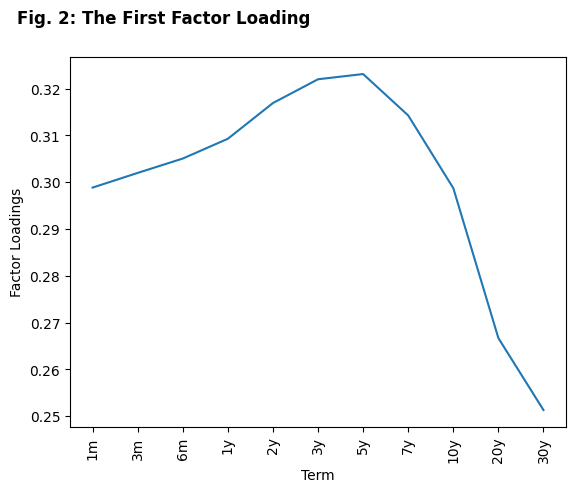

In [ ]:
fig, ax = pyplot.subplots()

pyplot.plot(df_eigvec["PC1"])
pyplot.suptitle(
    "Fig. 2: The First Factor Loading", fontweight="bold", horizontalalignment="right"
)
pyplot.ylabel("Factor Loadings")
ax.set_xticks(np.arange(11))
ax.set_xticklabels(df.columns, rotation="vertical")
pyplot.xlabel("Term")
pyplot.show()

The first factor loading (PC1) is the weighted combination of all the rates and represents a parallel shift in our yield curve. We can see that for one unit of the loading, the 1-month rate increases by  0.299
  basis points, the 2-month rate increases by  0.302
  basis points, and so on.

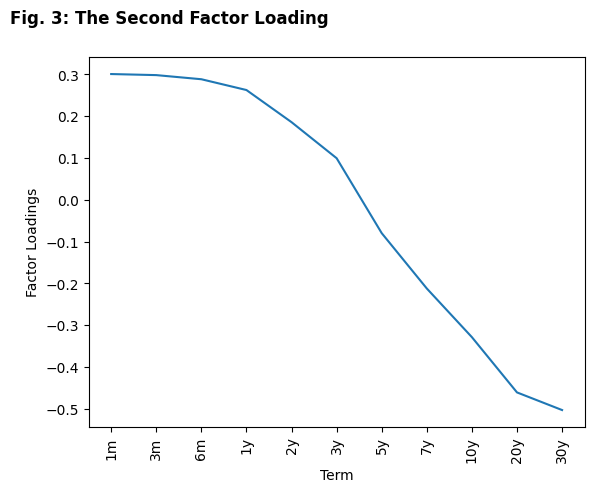

In [ ]:
fig, ax = pyplot.subplots()

pyplot.plot(df_eigvec["PC2"])
pyplot.suptitle(
    "Fig. 3: The Second Factor Loading", fontweight="bold", horizontalalignment="right"
)
pyplot.ylabel("Factor Loadings")
ax.set_xticks(np.arange(11))
ax.set_xticklabels(df.columns, rotation="vertical")
pyplot.xlabel("Term")
pyplot.show()

The second factor loading (PC2) represents a change of slope of the yield curve when the short end moves in the opposite direction of the long end zone. We can observe that the rates for 1 month to 4 years move in one direction and the rates between 5 years and 30 years move in the other direction.

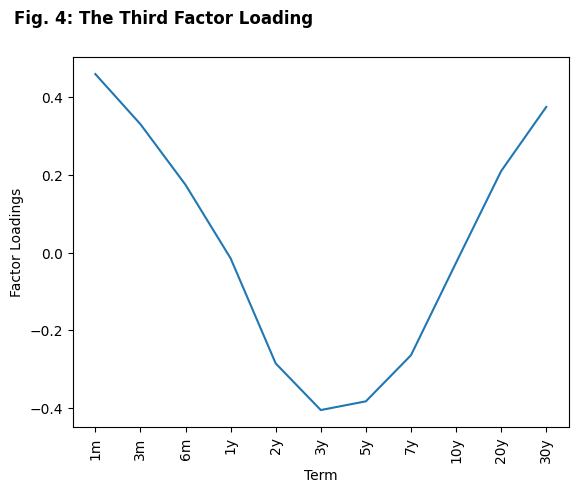

In [ ]:
fig, ax = pyplot.subplots()

pyplot.plot(df_eigvec["PC3"])
pyplot.suptitle(
    "Fig. 4: The Third Factor Loading", fontweight="bold", horizontalalignment="right"
)
pyplot.ylabel("Factor Loadings")


ax.set_xticklabels(df.columns, rotation="vertical")
pyplot.xlabel("Term")
pyplot.show()

The third factor loading (PC3) represents a twist of the sovereign yield curve, which happens when the short- and long-end segments move up simultaneously as the yield moves down.

We can now plot the scree plot to visualize the factor loadings' contribution to the variance of the dataset. /+

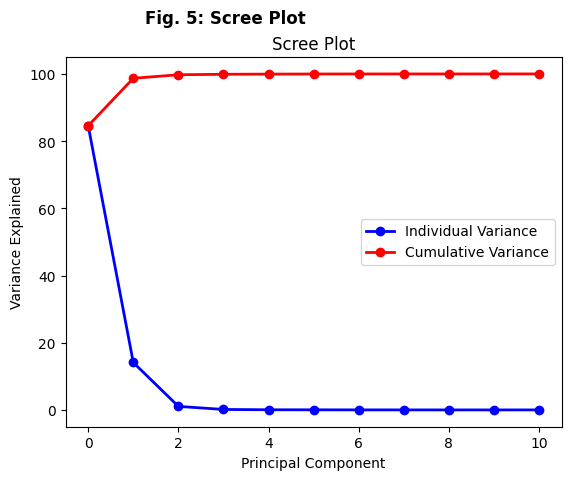

In [ ]:
PC_values = np.arange(11)
pyplot.plot(
    PC_values, df_eigval["Explained proportion"] * 100, "o-", linewidth=2, color="blue"
)
pyplot.plot(
    PC_values,
    df_eigval["Cumulative Explained Variance"] * 100,
    "o-",
    linewidth=2,
    color="red",
)
pyplot.suptitle("Fig. 5: Scree Plot", fontweight="bold", horizontalalignment="right")
pyplot.title("Scree Plot")
pyplot.xlabel("Principal Component")
pyplot.ylabel("Variance Explained")
pyplot.legend(["Individual Variance", "Cumulative Variance"])
pyplot.show()

We can see that the first two components describe more than  99%
of the variance and can therefore be used to describe the yield curve movement.

Now let's calculate the principal components, which are the dot product of the standardized data and the eigenvectors.All rights reserved WQU WorldQuant University QQQQ

In [ ]:
principal_components = df_std.dot(eigenvectors)
principal_components.columns = df_eigvec.columns
principal_components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
DATE,,,,,,,,,,,
2002-07-01,3.574124,-2.085145,-0.330615,0.078986,-0.147833,-0.145942,-0.016003,-0.031583,0.028906,-0.008011,0.019628
2002-07-02,3.418767,-2.027044,-0.249500,0.089874,-0.160039,-0.129226,-0.007133,-0.024215,0.029681,-0.011283,0.013333
2002-07-03,3.419252,-2.037616,-0.270736,0.107112,-0.146280,-0.138756,-0.004666,-0.034702,0.028646,-0.012002,0.019759
2002-07-05,3.637819,-2.137907,-0.359653,0.104295,-0.149551,-0.142310,-0.017868,-0.037177,0.032549,-0.007770,0.023953
2002-07-08,3.549390,-2.074497,-0.304246,0.098288,-0.140160,-0.141685,-0.011292,-0.024806,0.025970,-0.011050,0.015408


We now plot the first three components, which account for more than 99% of the explained variance in the data.

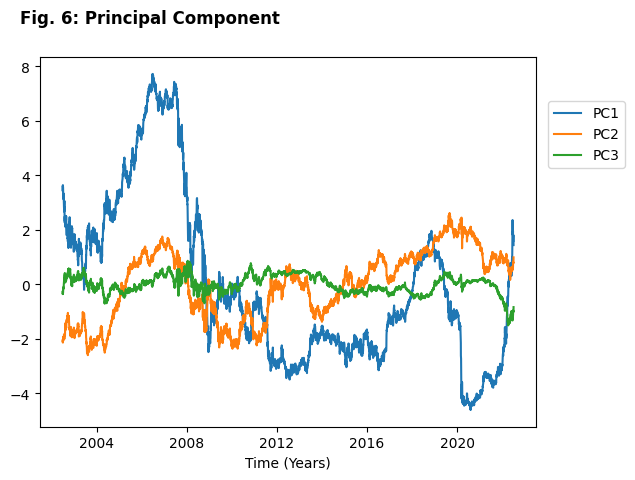

In [ ]:
pyplot.plot(principal_components[["PC1", "PC2", "PC3"]])
pyplot.xlabel("Time (Years)")
pyplot.suptitle(
    "Fig. 6: Principal Component", fontweight="bold", horizontalalignment="right"
)
pyplot.legend(["PC1", "PC2", "PC3"], bbox_to_anchor=(1.01, 0.9), loc=2)
pyplot.show()

The principal components do not tell us much, but from the diagram above, we can see that the first principal component is more volatile than the other two, which is expected.

Below is a function that sums up the PCA process we have seen above.

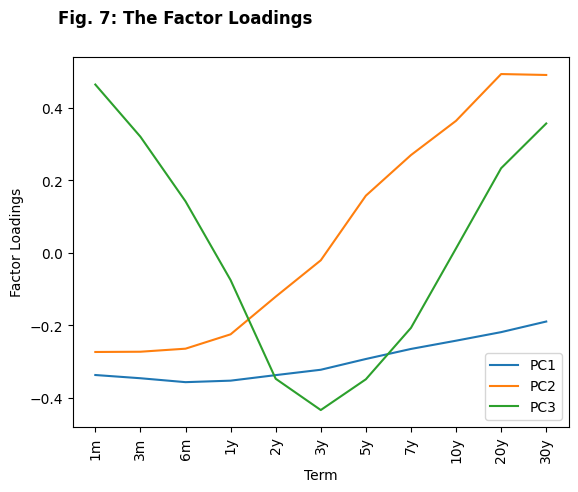

In [ ]:
def PCA_CALC(df, num_reconstruct):
    df -= df.mean(axis=0) / df.std()
    R = np.cov(df, rowvar=False)
    eigen_values, eigen_vectors = sp.linalg.eigh(R)
    eigen_vectors = eigen_vectors[:, np.argsort(eigen_values)[::-1]]
    eigen_values = eigen_values[np.argsort(eigen_values)[::-1]]
    eigen_vectors = eigen_vectors[:, :num_reconstruct]

    return np.dot(eigen_vectors.T, df.T).T, eigen_values, eigen_vectors

scores, evals, evecs = PCA_CALC(df, 11)

fig, ax = pyplot.subplots()

evecs = pd.DataFrame(evecs)
pyplot.plot(evecs.loc[:, 0:2])
pyplot.suptitle(
    "Fig. 7: The Factor Loadings", fontweight="bold", horizontalalignment="right"
)
pyplot.legend(["PC1", "PC2", "PC3"], loc="lower right")
pyplot.ylabel("Factor Loadings")
ax.set_xticks(np.arange(11))
ax.set_xticklabels(df.columns, rotation="vertical")
pyplot.xlabel("Term")
pyplot.show()

PC1 reflects a (mostly) parallel shift, PC2 reflects a tilt, and PC3 reflects a twist or butterfly.

We now work to reconstruct the original data from our factor loadings.

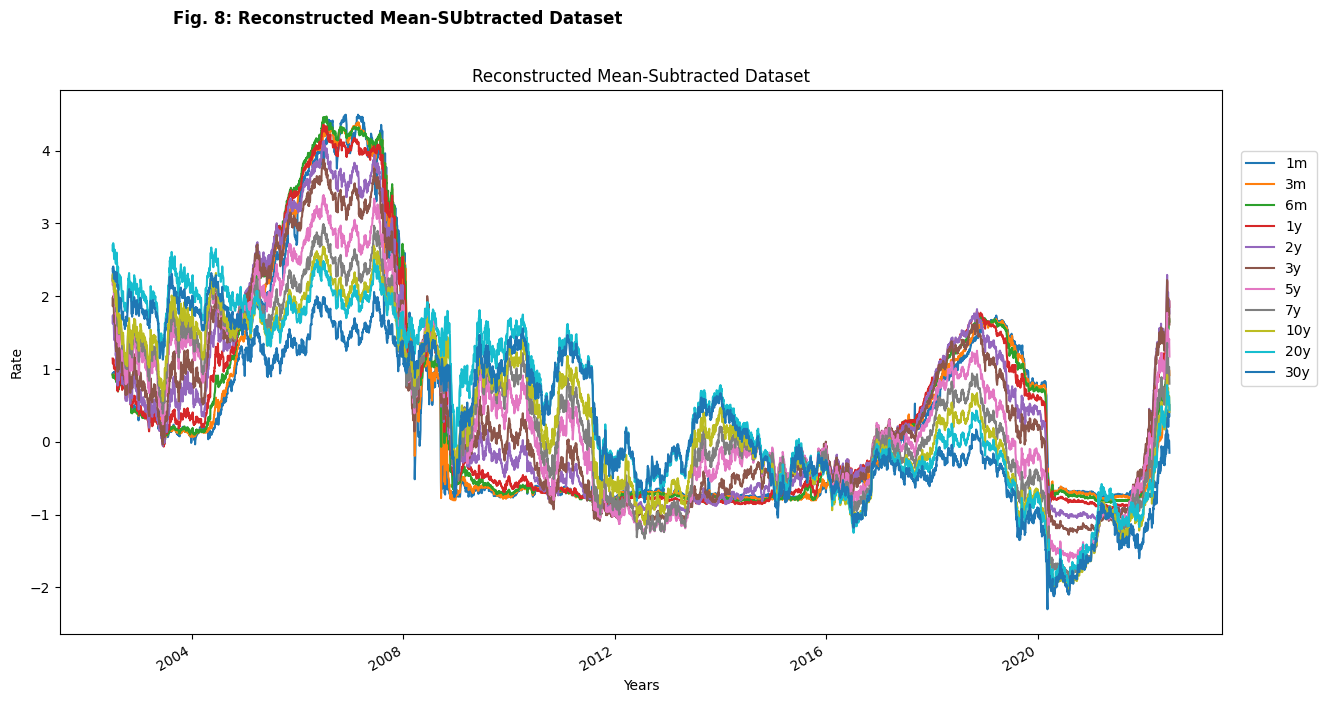

In [ ]:
reconst = pd.DataFrame(np.dot(scores, evecs.T), index=df.index, columns=df.columns)

reconst.plot(figsize=(15, 8))
pyplot.ylabel("Rate")
pyplot.xlabel("Years")
pyplot.title("Reconstructed Mean-Subtracted Dataset")
pyplot.suptitle(
    "Fig. 8: Reconstructed Mean-SUbtracted Dataset",
    fontweight="bold",
    horizontalalignment="right",
)
pyplot.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
pyplot.show()

We now reconstruct our original dataset from the principal components and plot the outcome.

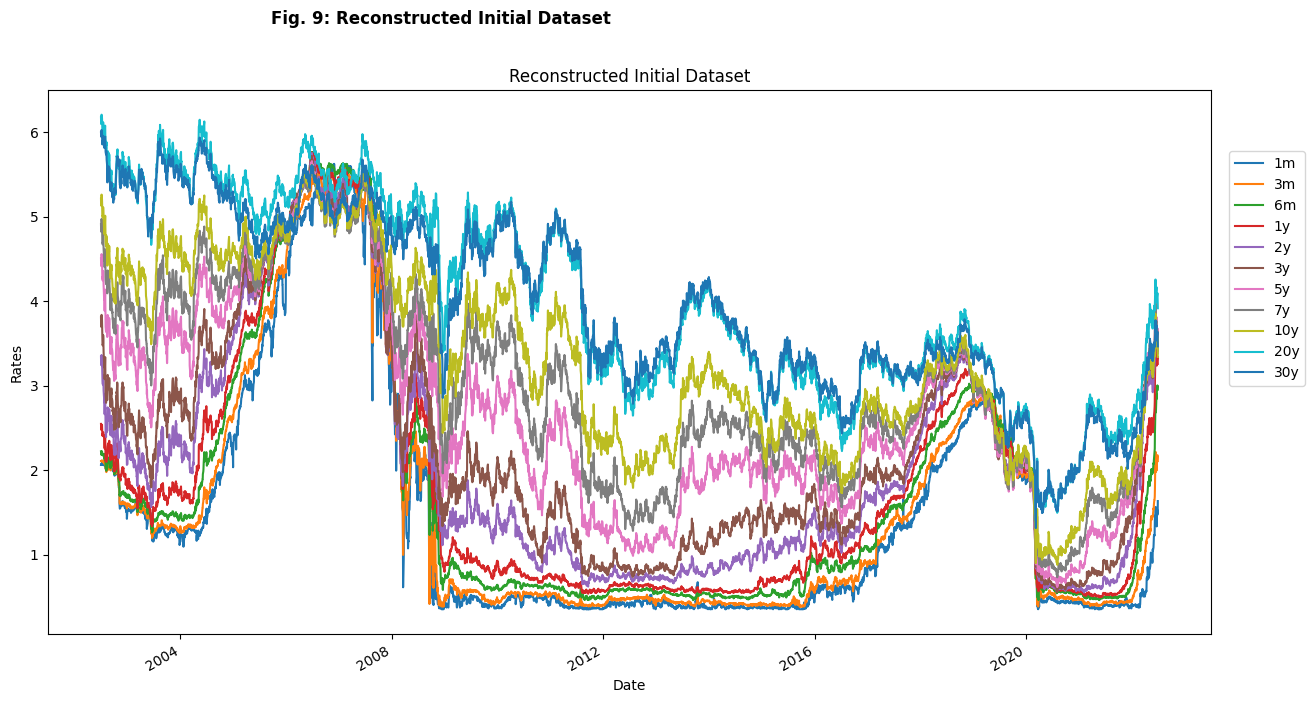

In [ ]:
for cols in reconst.columns:
    reconst[cols] = reconst[cols] + df2.mean(axis=0)[cols]

reconst.plot(figsize=(15, 8))
pyplot.xlabel("Date")
pyplot.ylabel("Rates")
pyplot.title("Reconstructed Initial Dataset")
pyplot.suptitle(
    "Fig. 9: Reconstructed Initial Dataset",
    fontweight="bold",
    horizontalalignment="right",
)
pyplot.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
pyplot.show()

Note that these steps can be implemented using a scikit learn module as shown below.

We start by computing the correlation between the term interests.

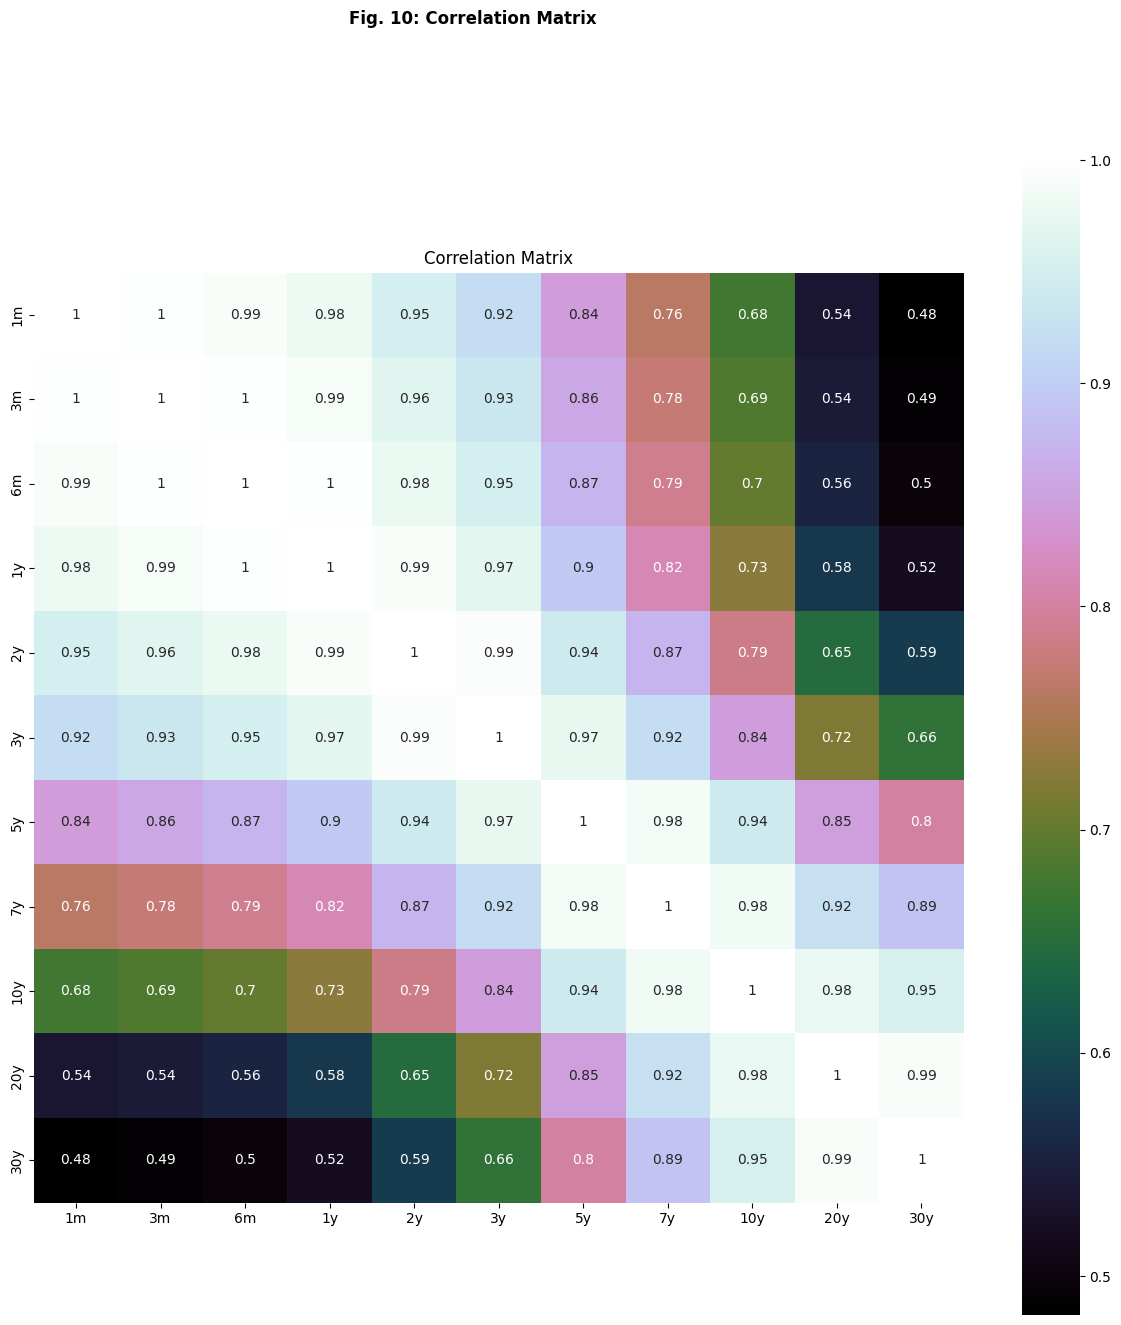

In [ ]:
# correlation
correlation = df.corr()
pyplot.figure(figsize=(15, 15))
pyplot.title("Correlation Matrix")
pyplot.suptitle(
    "Fig. 10: Correlation Matrix", fontweight="bold", horizontalalignment="right"
)
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="cubehelix");

Then, standardize the dataset as explained earlier. Note that when the variable scales are different, we use a correlation matrix, and when the variable scales are similar, we use a covariance matrix.

In [ ]:
scaler = StandardScaler().fit(df)
rescaleddf = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
# summarize transformed data
df.dropna(how="any", inplace=True)
rescaleddf.dropna(how="any", inplace=True)
rescaleddf.head(2)

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
DATE,,,,,,,,,,,
2002-07-01,0.398480,0.357483,0.315436,0.462902,0.900928,1.137737,1.473595,1.651839,1.683725,1.830282,1.869623
2002-07-02,0.405342,0.357483,0.302238,0.429193,0.829486,1.055142,1.400526,1.574656,1.613555,1.762608,1.842317


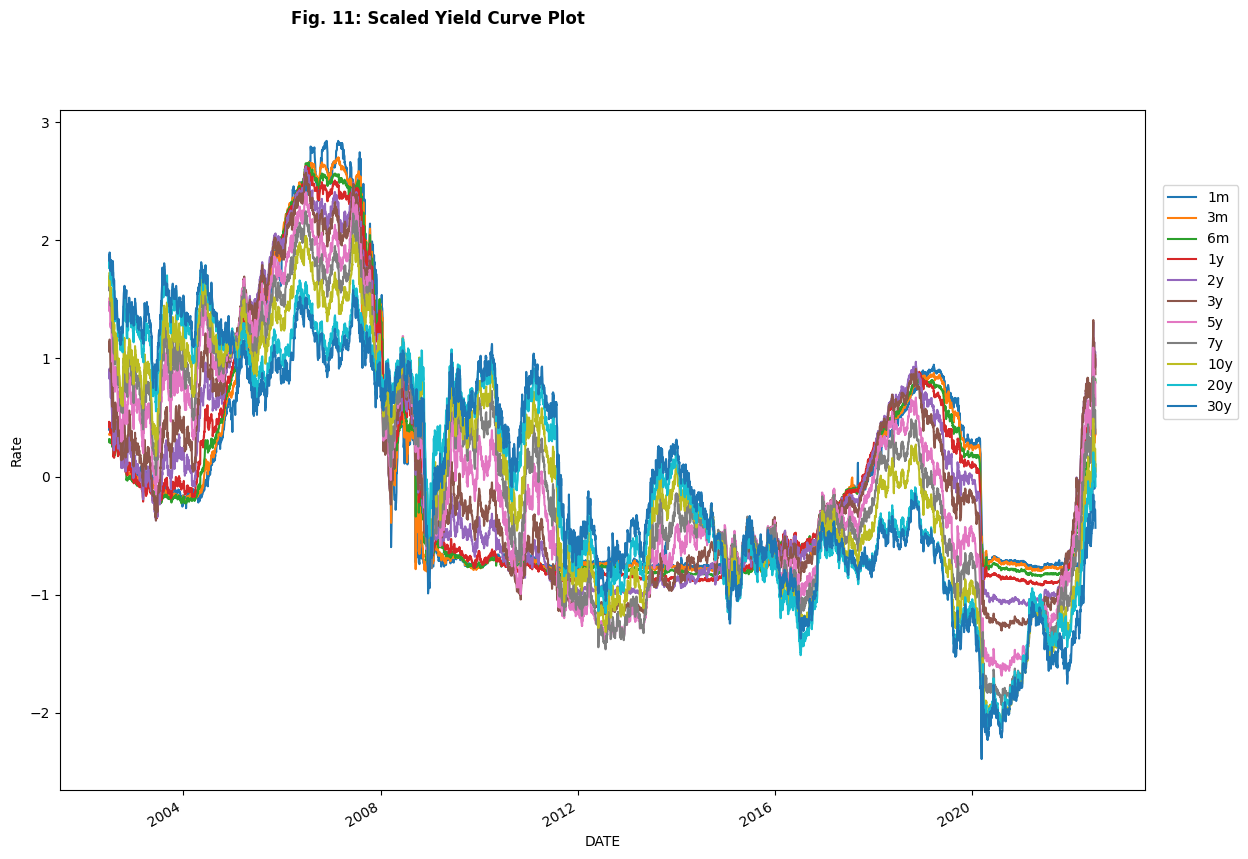

In [ ]:
#visualization of the scaled dataset below.
rescaleddf.plot(figsize=(14, 10))
pyplot.ylabel("Rate")
pyplot.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
pyplot.suptitle(
    "Fig. 11: Scaled Yield Curve Plot", fontweight="bold", horizontalalignment="right"
)
pyplot.show()

Calling the PCA algorithm and fit our data to it, then data transformation takes place here and visualize the explained variance of our components.

In [ ]:
model = PCA()
PrincipalComponent = model.fit(rescaleddf)

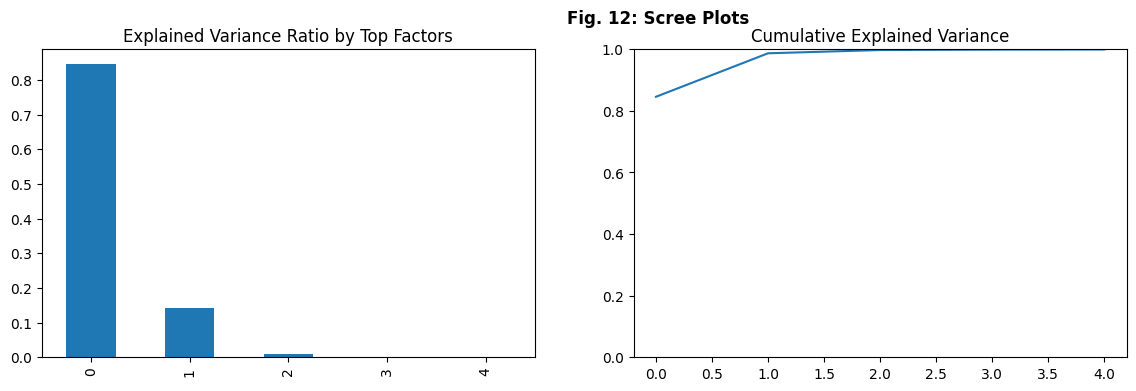

In [ ]:
NumEigenvalues = 5
fig, axes = pyplot.subplots(ncols=2, figsize=(14, 4))
pd.Series(model.explained_variance_ratio_[:NumEigenvalues]).sort_values(
    ascending=False
).plot.bar(title="Explained Variance Ratio by Top Factors", ax=axes[0])
pd.Series(model.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(
    ylim=(0, 1), ax=axes[1], title="Cumulative Explained Variance"
)

# explained_variance
pd.Series(np.cumsum(model.explained_variance_ratio_)).to_frame(
    "Explained Variance_Top 5"
).head(NumEigenvalues).style.format("{:,.2%}".format)
pyplot.suptitle("Fig. 12: Scree Plots", fontweight="bold", horizontalalignment="left")
pyplot.show()

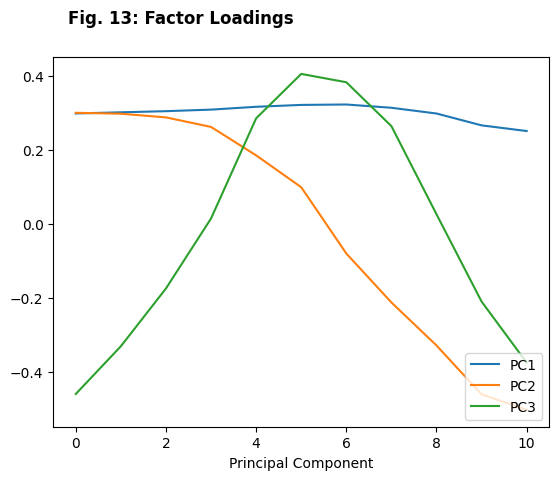

In [ ]:
pyplot.plot(model.components_[0:3].T)
pyplot.xlabel("Principal Component")
pyplot.suptitle(
    "Fig. 13: Factor Loadings", fontweight="bold", horizontalalignment="right"
)
pyplot.legend(["PC1", "PC2", "PC3"], loc="lower right")
pyplot.show()

Creating a dataframe having only the first 3 components, which is what we are interested in.

In [ ]:
model = PCA().fit(rescaleddf)
columns = ["pca_comp_%i" % i for i in range(11)]
df_pca = pd.DataFrame(
    model.transform(rescaleddf), columns=columns, index=rescaleddf.index
)
df_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10
DATE,,,,,,,,,,,
2002-07-01,3.574481,-2.085354,0.330648,-0.078994,-0.147848,-0.145957,-0.016004,-0.031586,0.019630,-0.008012,0.028909
2002-07-02,3.419108,-2.027247,0.249525,-0.089883,-0.160055,-0.129239,-0.007133,-0.024218,0.013334,-0.011284,0.029684
2002-07-03,3.419593,-2.037819,0.270763,-0.107122,-0.146294,-0.138770,-0.004666,-0.034706,0.019761,-0.012003,0.028649
2002-07-05,3.638182,-2.138121,0.359689,-0.104305,-0.149565,-0.142324,-0.017870,-0.037180,0.023955,-0.007771,0.032553
2002-07-08,3.549744,-2.074705,0.304277,-0.098298,-0.140174,-0.141699,-0.011293,-0.024808,0.015409,-0.011051,0.025972


In [ ]:
# get the component variance
# Proportion of Variance (from PC1 to PC11)
model.explained_variance_ratio_

array([8.45786113e-01, 1.41197910e-01, 1.05513169e-02, 1.38248662e-03,
       5.03244372e-04, 3.30956807e-04, 1.09931071e-04, 6.32611195e-05,
       3.59727453e-05, 2.29672224e-05, 1.58401481e-05])

In [ ]:
# Cumulative proportion of variance (from PC1 to PC6)
np.cumsum(model.explained_variance_ratio_)

array([0.84578611, 0.98698402, 0.99753534, 0.99891783, 0.99942107,
       0.99975203, 0.99986196, 0.99992522, 0.99996119, 0.99998416,
       1.        ])

In [ ]:
# component loadings or weights (correlation coefficient between original variables and the component)
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = model.components_
num_pc = model.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df["variable"] = df.columns.values
loadings_df = loadings_df.set_index("variable")
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
1m,0.298848,0.300686,-0.459758,-0.465314,-0.133805,-0.368517,-0.407481,0.251297,-0.001729,0.088969,0.039565
3m,0.301982,0.298141,-0.330672,-0.136150,0.025182,0.078686,0.444567,-0.578032,0.089353,-0.372915,-0.080010
6m,0.305050,0.288273,-0.174469,0.206979,0.242158,0.354228,0.227966,0.119633,-0.255831,0.633722,0.181965
1y,0.309276,0.262461,0.014895,0.408482,0.129362,0.217822,-0.137191,0.484804,0.138987,-0.452961,-0.354758
2y,0.316910,0.185601,0.285684,0.371349,-0.200027,-0.175227,-0.241468,-0.229083,0.315554,-0.020993,0.603398
3y,0.321990,0.099425,0.405800,0.086180,-0.243680,-0.318380,-0.022405,-0.244984,-0.207499,0.297600,-0.601207
5y,0.323103,-0.079812,0.383324,-0.311138,-0.064057,-0.019788,0.264179,0.265284,-0.540494,-0.330422,0.315463
7y,0.314257,-0.212167,0.264631,-0.424552,0.053113,0.185457,0.220749,0.178908,0.662427,0.208638,-0.075238
10y,0.298731,-0.328539,0.026318,-0.144642,0.330414,0.392473,-0.591747,-0.362172,-0.176012,-0.063760,-0.040253


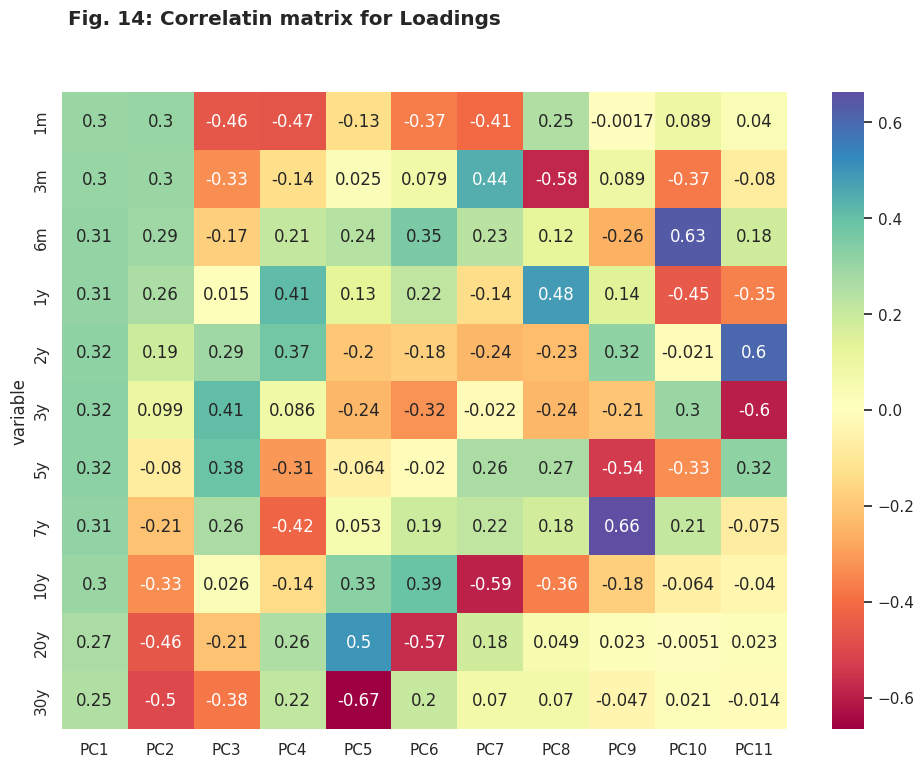

In [ ]:
# positive and negative values in component loadings reflects the positive and negative
# correlation of the variables with the PCs. Except A and B, all other variables have
# positive projection on first PC.

# get correlation matrix plot for loadings

import seaborn as sns

sns.set(rc={"figure.figsize": (11.7, 8.27)})
import matplotlib.pyplot as plt

ax = sns.heatmap(loadings_df, annot=True, cmap="Spectral")
pyplot.suptitle(
    "Fig. 14: Correlatin matrix for Loadings",
    fontweight="bold",
    horizontalalignment="right",
)
plt.show()

In [ ]:
# get eigenvalues (variance explained by each PC)
model.explained_variance_

array([9.30550648e+00, 1.55348740e+00, 1.16087680e-01, 1.52103919e-02,
       5.53679435e-03, 3.64125240e-03, 1.20948343e-03, 6.96011378e-04,
       3.95779275e-04, 2.52689934e-04, 1.74276450e-04])

So far, the three approaches we have applied have yielded similar results. So we want to plot the biplot of the first two principal components.

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
from pca import pca

In [ ]:
# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(rescaleddf)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


Fig. 15: Biplot without the scores
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


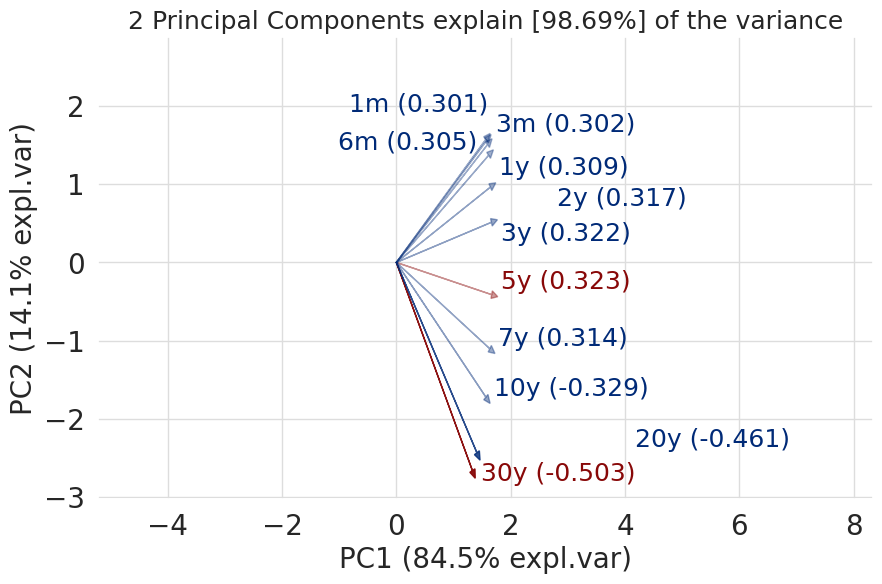

In [ ]:
# Make biplot with the number of features
print("\033[1m" + "Fig. 15: Biplot without the scores" + "\033[0m")
fig, ax = model.biplot(cmap=None, label=False, legend=False, figsize=(10, 6))

We can see short-term interest rates are highly correlated, and this can also be said of the long-term interest rates, this is because the angle between them is smaller. Comparing short-term and long-term interest rates, we can conclude that they are negatively correlated as the angle between them is wider. The mid-term interest rates seem not to be correlated with both the short- and long-term interest rates.

Let us assume we have a portfolio with the exposures to interest rate variation as shown in the table below:

In [ ]:
df_portfolio = pd.DataFrame(
    {
        "2 year rate": [10],
        "3 year rate": [4],
        "5 year rate": [-8],
        "7 year rate": [-7],
        "10 year rate": [2],
    }
)

df_portfolio

,2 year rate,3 year rate,5 year rate,7 year rate,10 year rate
0,10,4,-8,-7,2


The table reads as follows: A $1$ basis point would see our portfolio value increase by $\$ 10$ million considering the 2-year rate; similarly, we will see a $\$ 4$ million portfolio increase in a a 3-year rate, and so on.

From our scree plot, we saw that two-factor loadings were sufficient to model our yield rates as they account for more than $99 \%$ of the data variance. Recall our loadings dataframe.

In [ ]:
df_eigvec

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1m,0.298848,0.300686,0.459758,0.465314,-0.133805,-0.368517,-0.407481,0.251297,0.039565,0.088969,-0.001729
3m,0.301982,0.298141,0.330672,0.136150,0.025182,0.078686,0.444567,-0.578032,-0.080010,-0.372915,0.089353
6m,0.305050,0.288273,0.174469,-0.206979,0.242158,0.354228,0.227966,0.119633,0.181965,0.633722,-0.255831
1y,0.309276,0.262461,-0.014895,-0.408482,0.129362,0.217822,-0.137191,0.484804,-0.354758,-0.452961,0.138987
2y,0.316910,0.185601,-0.285684,-0.371349,-0.200027,-0.175227,-0.241468,-0.229083,0.603398,-0.020993,0.315554
3y,0.321990,0.099425,-0.405800,-0.086180,-0.243680,-0.318380,-0.022405,-0.244984,-0.601207,0.297600,-0.207499
5y,0.323103,-0.079812,-0.383324,0.311138,-0.064057,-0.019788,0.264179,0.265284,0.315463,-0.330422,-0.540494
7y,0.314257,-0.212167,-0.264631,0.424552,0.053113,0.185457,0.220749,0.178908,-0.075238,0.208638,0.662427
10y,0.298731,-0.328539,-0.026318,0.144642,0.330414,0.392473,-0.591747,-0.362172,-0.040253,-0.063760,-0.176012
20y,0.266688,-0.460667,0.209810,-0.255758,0.498101,-0.567897,0.181888,0.049459,0.023129,-0.005140,0.022999


calculating the exposure brought about by the first factor as

In [ ]:
10 * 0.3169 + 4 * 0.322 - 8 * 0.3231 - 7 * 0.3143 + 2 * 0.2987

0.26949999999999996

calculating the exposure brought about by the second factor as

In [ ]:
10 * 0.1856 + 4 * 0.0994 + 8 * 0.0798 + 7 * 0.2122 - 2 * 0.3285

3.7203999999999997


The first factor has very little exposure as compared to the second factor.

The change in the portfolio value becomes
$$\Delta P = 0.2695 f_1 + 3.7204 f_2$$

Recall the loadings variance below:

In [ ]:
df_eigval

,Eigenvalues,Explained proportion,Cumulative Explained Variance
0,9.303647,0.845786,0.845786
1,1.553177,0.141198,0.986984
2,0.116064,0.010551,0.997535
3,0.015207,0.001382,0.998918
4,0.005536,0.000503,0.999421
5,0.003641,0.000331,0.999752
6,0.001209,0.000110,0.999862
7,0.000696,0.000063,0.999925
8,0.000174,0.000016,0.999941
9,0.000253,0.000023,0.999964


calculating the standard deviation (factor score) as shown below:

In [ ]:
df_eigval["Factor_store"] = np.sqrt(df_eigval["Eigenvalues"])
df_eigval

,Eigenvalues,Explained proportion,Cumulative Explained Variance,Factor_store
0,9.303647,0.845786,0.845786,3.050188
1,1.553177,0.141198,0.986984,1.246265
2,0.116064,0.010551,0.997535,0.340682
3,0.015207,0.001382,0.998918,0.123318
4,0.005536,0.000503,0.999421,0.074402
5,0.003641,0.000331,0.999752,0.060337
6,0.001209,0.000110,0.999862,0.034774
7,0.000696,0.000063,0.999925,0.026379
8,0.000174,0.000016,0.999941,0.013200
9,0.000253,0.000023,0.999964,0.015895


The standard deviation of $\Delta P$ will therefore be

In [ ]:
0.2695 * 3.0502 + 3.7204 * 1.2463

5.45876342

Finally, the one day $99\%$ VaR is given by
$$\sigma(\Delta P) \times Z_{\alpha} $$


In [ ]:
5.45876342 * 2.32635

12.698994282117

## **Disadvantages**

1. Not suitable for non-linear relationships: PCA assumes linear relationships between variables. It may not perform well for data with complex non-linear relationships.
2. Loss of information: PCA discards information by focusing on the most significant components. This may not be ideal when all information is valuable.

## **Equations**

Let **A** be an $n×n$ matrix. The eigenvalues of **A**  are the solution to the characteristic equation
$$\text{determinant}(\textbf{A} - λ \textbf{I}) = |(\textbf{A} - λ \textbf{I})| = 0$$
where $\textbf{I}$ is an $n× n$ identity matrix.

If $λ$ is an eigenvalue of $\textbf{A}$, then there exists a vector $\vec{x}$ such that
$$\textbf{A} \vec{x} = λ \vec{x}$$

This vector $\vec{x}$ is referred to as the eigenvector of the matrix $\textbf{A}$ associated with the eigenvalue $λ$ and it is not unique.

Consider a $2×2$ matrix $\textbf{A}$ with eigenvectors $\vec{x_1}, \vec{x_2}$ and eigenvalues $λ_1, λ_2$. From the definition of eigenvectors, then
$$\textbf{A}\vec{x_1} = λ_1\vec{x_1}\\\textbf{A}\vec{x_2} = λ_2\vec{x_2}$$
which can be written as:
$$\textbf{A}[\vec{x_1}\hspace{3mm}\vec{x_2}] = [\vec{x_1}\hspace{3mm}\vec{x_2}]\pmatrix{λ_1 & 0\\ 0 & λ_2}$$.

Let $𝚽 = [\vec{x_1}\hspace{3mm}\vec{x_2}]$ and $Λ = \pmatrix{λ_1 & 0\\ 0 & λ_2}$. This translates to: $$\textbf{A}𝚽 = 𝚽 Λ$$

Normalizing the eigenvectors such that they are orthogonal we have;
$$𝚽 𝚽^T = 𝚽^T 𝚽 = \textbf{I}$$
which implies
$$𝚽^T \textbf{A}𝚽 = Λ$$
and
$$\textbf{A}=𝚽 Λ 𝚽^T$$.

How does this apply in the PCA process?

Let $S$ be an $m×m$ covariance (correlation) matrix, there exists an orthogonal $m\times m$ matrix, $𝚽$, such that the eigenvectors of S are the columns of $𝚽$ and the eigenvalues of $S$ are the diagonal of the matrix $Λ$ such that:
$$𝚽^T S 𝚽 = \Lambda$$
The eigenvectors of the covariance (correlation) matrix give us the direction vectors $Φ_1, Φ_2$. We can create a transformation matrix from the eigenvectors that transform our data from the $[x_1, x_2]$ axis system to the $[Φ_1, Φ_2]$ axis system using equation
$$p_{Φ} = (p_x - \mu_x)\cdot Φ$$
with $p_x$ being any point in the $[x_1, x_2]$ axis system and $\mu_x$ is the data mean.

## **Features**

1. Handling Missing Values: PCA can handle missing values well, making it suitable for datasets with incomplete information.
2. Multicollinearity: PCA addresses multicollinearity by creating uncorrelated principal components.


## **Keywords**

1. Dimensionality Reduction
2. Principal Component Analysis
3. Feature Extraction
4. Multivariate Analysis
5. Data compression
6. Unsupervised learning
7. Linear transformation
8. Eigenvalues
9. Eigenvectors